In [33]:
import numpy as np
import time

# Define the LSL stream parameters
sampling_rate = 500

# Define the signal generation parameters
duration = 6     # Duration of each segment of the signal (seconds)
base_frequency = 24  # Frequency of the sinusoidal components (Hz)
noise_amplitude = 5  # Amplitude of the random noise component
t = np.arange(0, duration, 1/sampling_rate)
eeg_channel = np.sin(2 * np.pi * base_frequency * t) + noise_amplitude * np.random.randn(len(t))

Text(0, 0.5, 'Amplitude')

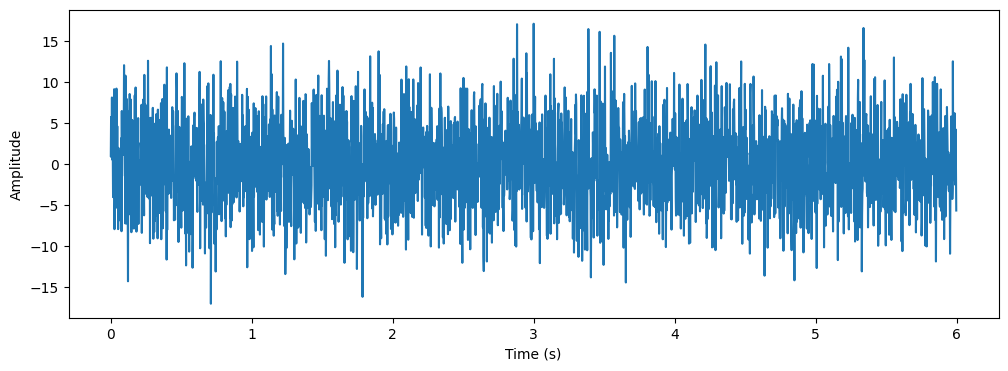

In [34]:

from matplotlib import pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(t, eeg_channel)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")



Text(0, 0.5, 'Amplitude')

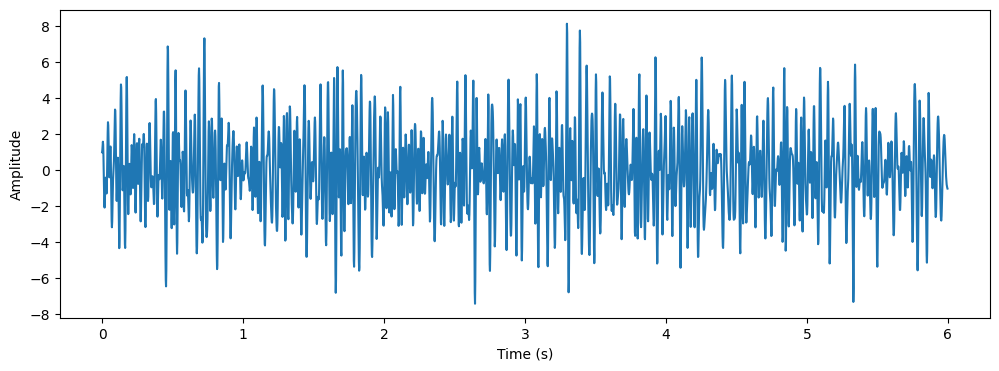

In [35]:
from scipy import signal
import scipy

def add_padding(data, lenght=100):
    return padding(data, lenght)

def remove_padding(data, length=100):
    return data[length:-length]

def padding(data, pad_length = 100):
    return np.pad(data, (pad_length, pad_length), mode="reflect")

def zero_phase_butter(data):
    # Butterworth filter parameters
    fs = 250
    lowcut = 8.0
    highcut = 30.0
    order = 10

    # Design Butterworth bandpass filter
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b_bandpass, a_bandpass = signal.butter(order, [low, high], btype="band")

    # Zero-phase filtering using filtfilt
    return signal.filtfilt(b_bandpass, a_bandpass, data)


def notch(data):
    fs = 250.0  # Sample frequency (Hz)
    f0 = 50.0  # Frequency to be removed from signal (Hz)
    Q = 30.0  # Quality factor
    # Design notch filter
    b_notch, a_notch = signal.iirnotch(f0, Q, fs)
    return signal.lfilter(b_notch, a_notch, data)

eeg_channel = add_padding(eeg_channel)
eeg_channel = notch(eeg_channel)
eeg_channel = zero_phase_butter(eeg_channel)
eeg_channel = remove_padding(eeg_channel)

plt.figure(figsize=(12, 4))
plt.plot(t, eeg_channel)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")